In [ ]:
!pip install nltk
!pip install emoji
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import requests
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
import numpy as np
pd.set_option('display.max_colwidth', None)
from time import time
import re
import string
import os
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator,TransformerMixin
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
np.random.seed(37)

In [ ]:
import pandas as pd
#subir repositorio mejor
url='https://raw.githubusercontent.com/edgarcorrea1/panda/main/ba.csv'
df=pd.read_csv(url, encoding='latin-1', sep=',')
df=df.loc[df.loc[:, 'Country'] == "CO"]
df.head(10)

,Unnamed: 0,Country,Brand,ARTICLE_ID,AUTHOR,MEDIA_PROVIDER,HEADLINE,SOURCE,HASHTAG_MENTIONED,USERNAME_MENTIONED,...,final_sentimiento,final_intencion,final_ocasion,final_pasion,final_oportunidad,final_sobre_que,categoria,direction,service_model,cola_respuestas
0,0,CO,POKER,1.124600e+12,MARCOS ANTONIO ZUÑIGA CONTRERAS,Facebook Comments,Comment From: Marcos Antonio Zuñiga Contreras,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CO,POKER,1.124600e+12,DANILO ROMO,Facebook Comments,Comment From: Danilo Romo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,CO,POKER,1.124600e+12,JHON TISOY JACANAMIJOY,Facebook Comments,Comment From: Jhon Tisoy Jacanamijoy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,CO,POKER,1.124600e+12,SOFIA BALDIÓN,Facebook Comments,Comment From: Sofia Baldión,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,CO,POKER,1.124600e+12,FERNEY ORTIZ,Facebook Comments,Comment From: Ferney Ortiz,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,CO,POKER,1.124600e+12,ARTURO MESA,Facebook Comments,Comment From: Arturo Mesa,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,CO,POKER,1.124600e+12,WILLIAM RUIZ,Facebook Comments,Comment From: William Ruiz,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,CO,POKER,1.124600e+12,MIGUEL ÁNGEL,Facebook Comments,Comment From: Miguel Ángel,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,CO,POKER,1.124600e+12,ALEXIS HERNANDEZ,Facebook Comments,Comment From: Alexis Hernandez,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,CO,POKER,1.124600e+12,JAMES GARCÍA,Facebook Comments,Comment From: James García,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df=pd.read_excel("/datos_bavaria_1.xlsx")
df.head()

,Unnamed: 0,Country,Brand,ARTICLE_ID,AUTHOR,MEDIA_PROVIDER,HEADLINE,SOURCE,HASHTAG_MENTIONED,USERNAME_MENTIONED,...,final_sentimiento,final_intencion,final_ocasion,final_pasion,final_oportunidad,final_sobre_que,categoria,direction,service_model,cola_respuestas
0,0,CO,POKER,1.124600e+12,MARCOS ANTONIO ZUÑIGA CONTRERAS,Facebook Comments,Comment From: Marcos Antonio Zuñiga Contreras,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CO,POKER,1.124600e+12,DANILO ROMO,Facebook Comments,Comment From: Danilo Romo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,CO,POKER,1.124600e+12,JHON TISOY JACANAMIJOY,Facebook Comments,Comment From: Jhon Tisoy Jacanamijoy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,CO,POKER,1.124600e+12,SOFIA BALDIÓN,Facebook Comments,Comment From: Sofia Baldión,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,CO,POKER,1.124600e+12,FERNEY ORTIZ,Facebook Comments,Comment From: Ferney Ortiz,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'Country', 'Brand', 'ARTICLE_ID', 'AUTHOR',
       'MEDIA_PROVIDER', 'HEADLINE', 'SOURCE', 'HASHTAG_MENTIONED',
       'USERNAME_MENTIONED', 'WORKFLOW_ASSIGNMENT', 'WORKFLOW_CLASSIFICATION',
       'DURATION_FIRST_TO_LAST', 'WORKFLOW_ENGAGEMENT', 'WORKFLOW_AUTHORTAGS',
       'WORKFLOW_BLOGTAGS', 'WORKFLOW_BLOGPOSTTAGS', 'FIRST_ASSIGNMENT_DATE',
       'WORKFLOW_AUTHORNOTES', 'WORKFLOW_BLOGNOTES', 'WORKFLOW_BLOGPOSTNOTES',
       'FIRST_ENGAGEMENT_ACTIVITY', 'WORKFLOW_PRIORITY',
       'LAST_ENGAGEMENT_ACTIVITY', 'EXTERNAL_AUTHOR_ID', 'EXTERNAL_ID',
       'SENTIMENT', 'DURATION_PUBLISHED_TO_FIRST', 'POST_TYPE', 'CONTENT',
       'PUBLISH_DATE', 'HARVESTED_DATE', 'user', 'fecha', 'Accion', 'Tpo_Rta',
       'Tipo', 'Keeper_Filtra', 'Keeper_Responding', 'FileType', 'ARTICLE_URL',
       'First', 'Campañas', 'Direcionamiento', 'Tpo_Filtra', 'Tpo_Resp',
       'Project Care', 'id_compound', 'plataforma', 'respuesta_sugerida',
       'data_processing_status', 'post_lin

In [ ]:
df[['Campañas','SENTIMENT','CONTENT','MEDIA_PROVIDER']].head()

,Campañas,SENTIMENT,CONTENT,MEDIA_PROVIDER
0,USUARIO,Positive,Esquipo lokillo excelente,Facebook Comments
1,USUARIO,Negative,Qué aburridos,Facebook Comments
2,USUARIO,Neutral,Hassam,Facebook Comments
3,USUARIO,Positive,no estuvo entretenido,Facebook Comments
5,USUARIO,Positive,Super bien. Los mejores,Facebook Comments


SENTIMENT
Positive     468
Neutral      367
Negative      55
dtype: int64


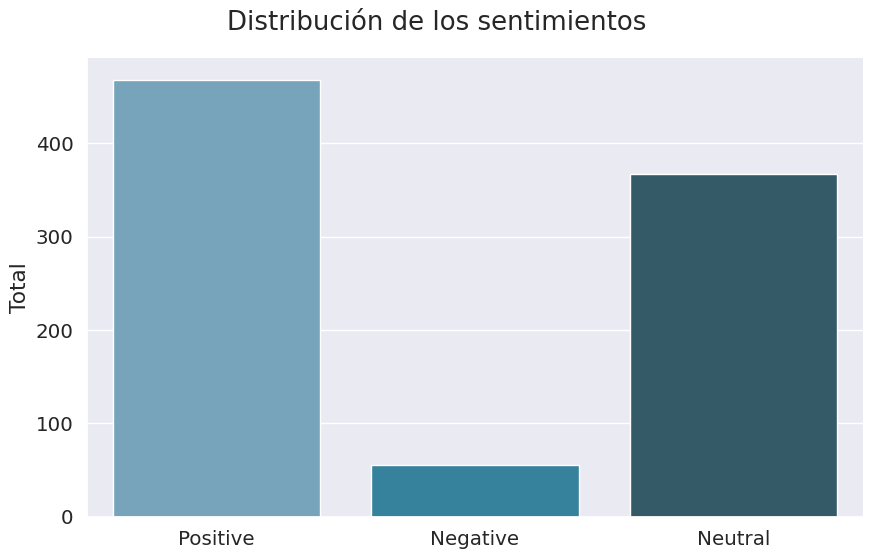

In [ ]:
print(df[['SENTIMENT']].value_counts())
sent=sns.catplot(x="SENTIMENT", data=df, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
sent.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
sent.fig.suptitle('Distribución de los sentimientos')
sent.set_axis_labels("", "Total")
plt.show();

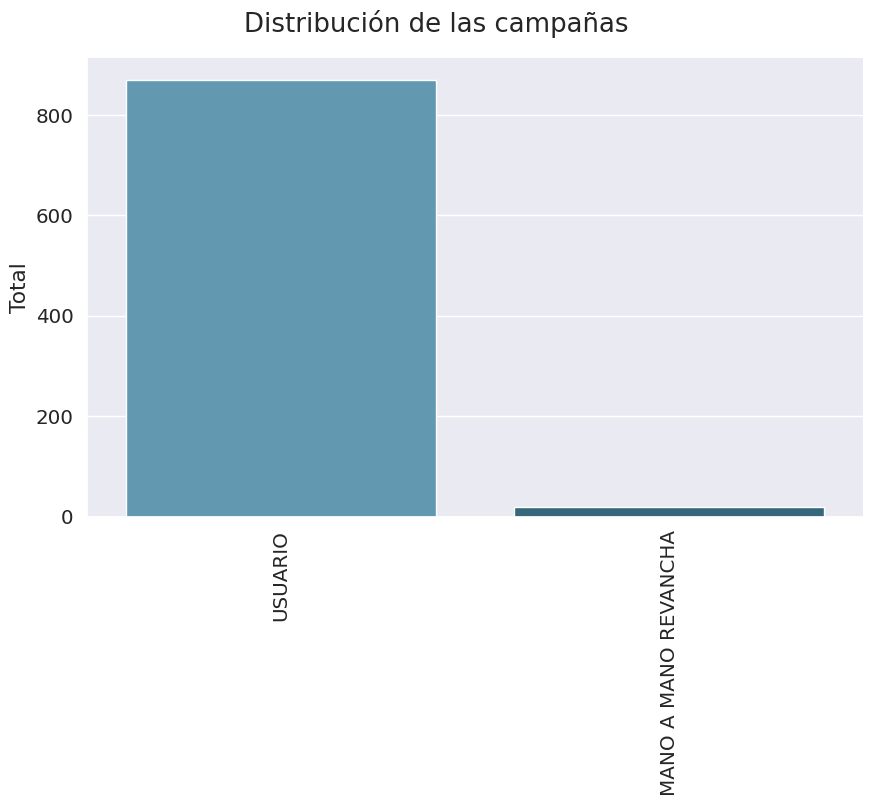

In [ ]:
camp=sns.catplot(x="Campañas", data=df, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
camp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
camp.fig.suptitle('Distribución de las campañas')
camp.set_axis_labels("", "Total")
camp.set_xticklabels(rotation=90)

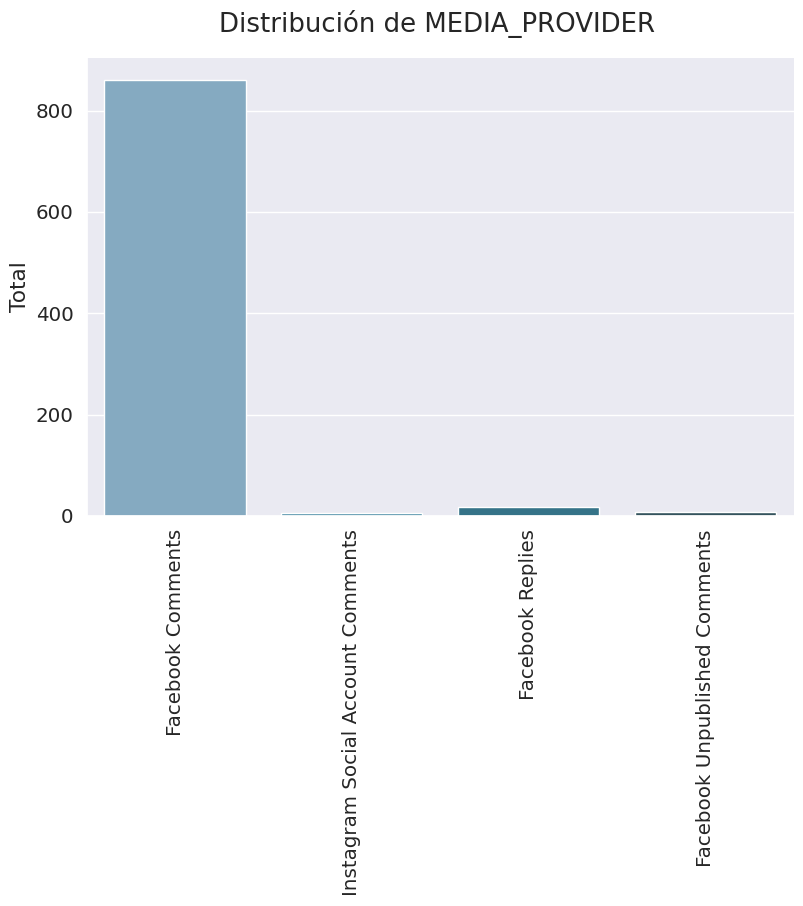

In [ ]:
med=sns.catplot(x="MEDIA_PROVIDER", data=df, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
med.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
med.fig.suptitle('Distribución de MEDIA_PROVIDER')
med.set_axis_labels("", "Total")
med.set_xticklabels(rotation=90)

In [ ]:
class TextCounts(BaseEstimator, TransformerMixin):

    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))

    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self

    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x))
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))

        df = pd.DataFrame({'conteo_palabras': count_words
                           , 'conteo_menciones': count_mentions
                           , 'conteo_hashtags': count_hashtags
                           , 'conteo_palabras_mayusculas': count_capital_words
                           , 'conteo_exclam_interog': count_excl_quest_marks
                           , 'conteo_urls': count_urls
                           , 'conteo_emojis': count_emojis
                          })

        return df
tc = TextCounts()
df_eda = tc.fit_transform(df.CONTENT.astype(str))
df_eda['SENTIMENT'] = df.SENTIMENT

In [ ]:
def show_dist(df, col):
    print('Estadísticas descriptivas para el {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('SENTIMENT')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='SENTIMENT', size=5, hue='SENTIMENT', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()

In [ ]:
show_dist(df_eda,'conteo_palabras')
show_dist(df_eda,'conteo_palabras_mayusculas')

Estadísticas descriptivas para el conteo_palabras
-------------------------------------
           count      mean       std  min  25%  50%  75%   max
SENTIMENT                                                     
Negative    55.0  5.745455  3.893100  1.0  3.0  5.0  8.0  25.0
Neutral    367.0  2.133515  2.503799  0.0  1.0  1.0  3.0  31.0
Positive   468.0  5.215812  3.673274  1.0  2.0  4.0  7.0  33.0


TypeError: ignored

# Procesamiento

In [ ]:
## Vamos a eliminar las URL
df['CONTENT']=df['CONTENT'].astype(str)
df['CONTENT'] = df['CONTENT'].apply(
    lambda x: re.sub(r'http\S+', '',x)
)

In [ ]:
# Convertimos todo el texto a minúscula

df['CONTENT'] = df.CONTENT.apply(lambda x: x.lower())

In [ ]:
## Reemplazar tildes y puntuación y cambiar algunas palabras

df['CONTENT'] = df['CONTENT'].apply(
    lambda x: re.sub('á', 'a',  x)
)
df['CONTENT'] = df['CONTENT'].apply(
    lambda x: re.sub('é', 'e',  x)
)
df['CONTENT'] = df['CONTENT'].apply(
    lambda x: re.sub('í', 'i',  x)
)
df['CONTENT'] = df['CONTENT'].apply(
    lambda x: re.sub('ó', 'o',  x)
)
df['CONTENT'] = df['CONTENT'].apply(
    lambda x: re.sub('ú', 'u',  x)
)
df['CONTENT'] = df['CONTENT'].apply(
    lambda x: re.sub(r'[^\w\s]','',x)
)
df['CONTENT'] = df['CONTENT'].apply(
    lambda x: re.sub('hassan','hassam',x)
)
df['CONTENT'] = df['CONTENT'].apply(
    lambda x: re.sub('hasam','hassam',x)
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<Axes: title={'center': 'Frecuencia de las palabras en todo el dataset'}>

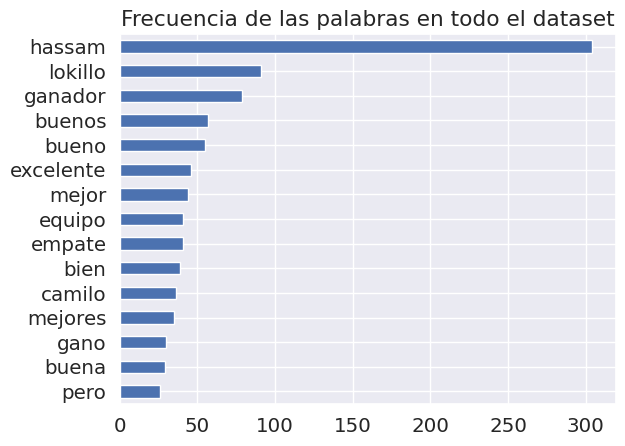

In [ ]:
import nltk
nltk.download('punkt')

texto=''
for i in df['CONTENT']:
    texto += i+' '
texto=re.sub('hassan','hassam',texto)
tokens = nltk.tokenize.word_tokenize(texto)
pd.Series([w for w in tokens if len(w) > 3]).value_counts()
pd.Series([w for w in tokens if len(w) > 3]).value_counts()[:15][::-1].plot(kind='barh',title='Frecuencia de las palabras en todo el dataset')

<Axes: title={'center': 'Frecuencia de las palabras en los comentarios negativos'}>

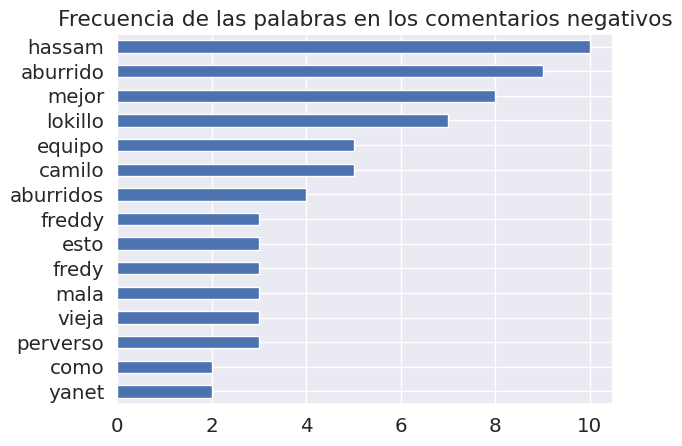

In [ ]:
texto=''
negativos=df[df['SENTIMENT']=='Negative']
for i in negativos['CONTENT']:
    texto += i+' '
texto=re.sub('hassan','hassam',texto)
tokens = nltk.tokenize.word_tokenize(texto)
pd.Series([w for w in tokens if len(w) > 3]).value_counts()
pd.Series([w for w in tokens if len(w) > 3]).value_counts()[:15][::-1].plot(kind='barh',title='Frecuencia de las palabras en los comentarios negativos')

<Axes: title={'center': 'Frecuencia de las palabras en los comentarios neutrales'}>

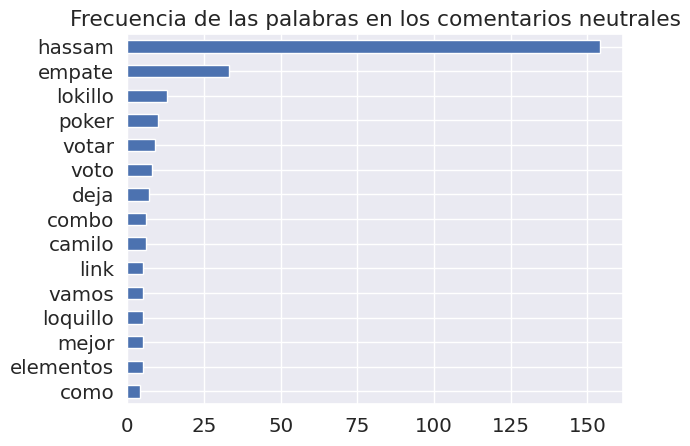

In [ ]:
texto=''
neutrales=df[df['SENTIMENT']=='Neutral']
for i in neutrales['CONTENT']:
    texto += i+' '
texto=re.sub('hassan','hassam',texto)
tokens = nltk.tokenize.word_tokenize(texto)
pd.Series([w for w in tokens if len(w) > 3]).value_counts()
pd.Series([w for w in tokens if len(w) > 3]).value_counts()[:15][::-1].plot(kind='barh',title='Frecuencia de las palabras en los comentarios neutrales')

<Axes: title={'center': 'Frecuencia de las palabras en los comentarios positivos'}>

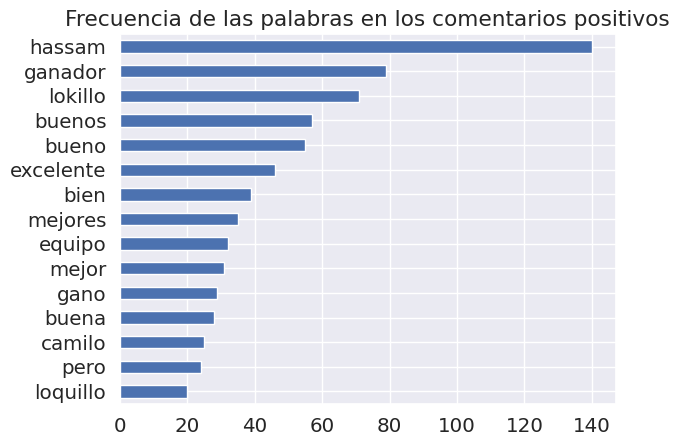

In [ ]:
texto=''
positivos=df[df['SENTIMENT']=='Positive']
for i in positivos['CONTENT']:
    texto += i+' '
texto=re.sub('hassan','hassam',texto)
tokens = nltk.tokenize.word_tokenize(texto)
pd.Series([w for w in tokens if len(w) > 3]).value_counts()
pd.Series([w for w in tokens if len(w) > 3]).value_counts()[:15][::-1].plot(kind='barh',title='Frecuencia de las palabras en los comentarios positivos')

In [ ]:
import nltk
nltk.download('stopwords')
# Para poder usar los algoritmos de análisis de sentimientos, se deben eliminar las palabras conocidas como stopwords
# que son artículos o preposiciones que no aportan al sentido de los comentarios

stop = stopwords.words('spanish')
df["CONTENT"]=df["CONTENT"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
df['CONTENT']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0      esquipo lokillo excelente
1                      aburridos
2                         hassam
3                    entretenido
5             super bien mejores
                 ...            
994                       hassam
995                       siiiii
996                       empate
997                       empate
998                   deja botar
Name: CONTENT, Length: 890, dtype: object

In [ ]:
# Se usan el 30% de los datos para validación y el 70% restante para el entrenamiendo
# Se codifican las clases de SENTIMENT para que sean enteros

asignacion_1 = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
def decode_sentiment(label):
    return asignacion_1[label]
df.target = df.SENTIMENT.apply(lambda x: decode_sentiment(x))
x_train, x_test, y_train, y_test = train_test_split(
     df.CONTENT, df.target, test_size=0.3, shuffle=False, random_state=11)

In [ ]:
# Crear vectores de características, esto asigna un número a cada palabra de nuestro dataset

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

In [ ]:
# Clasificador SVM con kernel lineal

classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, y_train)
prediction_linear = classifier_linear.predict(test_vectors)
report = classification_report(y_test, prediction_linear, output_dict=True)
print('Negativos:',report['-1'])
print('Neutrales:',report['0'])
print('Positivos:',report['1'])

Negativos: {'precision': 0.3333333333333333, 'recall': 0.14285714285714285, 'f1-score': 0.2, 'support': 7}
Neutrales: {'precision': 0.9513513513513514, 'recall': 0.8934010152284264, 'f1-score': 0.9214659685863875, 'support': 197}
Positivos: {'precision': 0.7341772151898734, 'recall': 0.9206349206349206, 'f1-score': 0.8169014084507041, 'support': 63}


In [ ]:
# Matriz de confusión
# La matriz de confusión nos indica qué tan bien clasificó nuestro algoritmo a los datos de validación

confusion = confusion_matrix(y_test, prediction_linear)
print('La matriz de confusión para el SVM con kernel lineal es: \n',confusion)

La matriz de confusión para el SVM con kernel lineal es: 
 [[  1   4   2]
 [  2 176  19]
 [  0   5  58]]


In [ ]:
# Clasificador SVM con kernel rbf

classifier_rbf = svm.SVC(kernel='rbf',gamma=0.3)
classifier_rbf.fit(train_vectors, y_train)
prediction_rbf = classifier_rbf.predict(test_vectors)
report = classification_report(y_test, prediction_rbf, output_dict=True)
print('Negativos:',report['-1'])
print('Neutrales:',report['0'])
print('Positivos:',report['1'])

Negativos: {'precision': 1.0, 'recall': 0.14285714285714285, 'f1-score': 0.25, 'support': 7}
Neutrales: {'precision': 0.9644970414201184, 'recall': 0.8274111675126904, 'f1-score': 0.8907103825136613, 'support': 197}
Positivos: {'precision': 0.6288659793814433, 'recall': 0.9682539682539683, 'f1-score': 0.7624999999999998, 'support': 63}


In [ ]:
# Matriz de confusión

confusion = confusion_matrix(y_test, prediction_rbf)
print('La matriz de confusión para el SVM con kernel rbf es: \n',confusion)

La matriz de confusión para el SVM con kernel rbf es: 
 [[  1   4   2]
 [  0 163  34]
 [  0   2  61]]


In [ ]:
clf_lineal = svm.SVC(kernel='linear')
train_vectors = vectorizer.fit_transform(df['CONTENT'])
cv_scores=cross_val_score(clf_lineal, train_vectors,df.target,cv=5)
print('Cross-validation (accuracy)', cross_val_score(clf_lineal, train_vectors,
                                                     df.target,
                                                     cv=5))
print('Promedio cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation (accuracy) [0.83707865 0.86516854 0.83707865 0.8258427  0.84831461]
Promedio cross-validation score (5-fold): 0.843


In [ ]:
clf_rbf = svm.SVC(kernel='rbf',gamma=0.3)
train_vectors = vectorizer.fit_transform(df['CONTENT'])
cv_scores=cross_val_score(clf_rbf, train_vectors,df.target,cv=5)
print('Cross-validation (accuracy)', cross_val_score(clf_rbf, train_vectors,
                                                     df.target,
                                                     cv=5))
print('Promedio cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation (accuracy) [0.8258427  0.83707865 0.85393258 0.83707865 0.87078652]
Promedio cross-validation score (5-fold): 0.845


In [ ]:
train_vectors = vectorizer.fit_transform(x_train)
classifier_random = DecisionTreeClassifier().fit(train_vectors, y_train)
prediction_random=classifier_random.predict(test_vectors)
report = classification_report(y_test, prediction_random, output_dict=True)
print('Negativos:',report['-1'])
print('Neutrales:',report['0'])
print('Positivos:',report['1'])

Negativos: {'precision': 0.07142857142857142, 'recall': 0.14285714285714285, 'f1-score': 0.09523809523809523, 'support': 7}
Neutrales: {'precision': 0.9468085106382979, 'recall': 0.9035532994923858, 'f1-score': 0.9246753246753245, 'support': 197}
Positivos: {'precision': 0.8153846153846154, 'recall': 0.8412698412698413, 'f1-score': 0.8281250000000001, 'support': 63}


In [ ]:
# matriz de confusión

confusion = confusion_matrix(y_test, prediction_random)
print('La matriz de confusión para el SVM con kernel rbf es: \n',confusion)

La matriz de confusión para el SVM con kernel rbf es: 
 [[  1   4   2]
 [  9 178  10]
 [  4   6  53]]


In [ ]:
clf_random_cv = DecisionTreeClassifier()
train_vectors = vectorizer.fit_transform(df['CONTENT'])
cv_scores=cross_val_score(clf_random_cv, train_vectors,df.target,cv=5)
print('Cross-validation (accuracy)', cross_val_score(clf_random_cv, train_vectors,
                                                     df.target,
                                                     cv=5))
print('Promedio cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation (accuracy) [0.81460674 0.8258427  0.83707865 0.83146067 0.81460674]
Promedio cross-validation score (5-fold): 0.825


In [ ]:
print('Accuracy del clasificador SVM con kernel lineal: {:.2f}'.format(accuracy_score(y_test, prediction_linear)))
print('Accuracy del clasificador SVM con kernel rbf: {:.2f}'.format(accuracy_score(y_test, prediction_rbf)))
print('Accuracy del clasificador árbol de decisión: {:.2f}'
     .format(classifier_random.score(test_vectors, y_test)))

Accuracy del clasificador SVM con kernel lineal: 0.88
Accuracy del clasificador SVM con kernel rbf: 0.84
Accuracy del clasificador árbol de decisión: 0.87


In [ ]:
print('El f1 para el SVM con kernel lineal es: ',f1_score(y_test, prediction_linear, average='macro'))
print('El f1 para el SVM con kernel rbf es: ',f1_score(y_test, prediction_rbf, average='macro'))
print('El f1 para el árbol de decision es: ',f1_score(y_test, prediction_random, average='macro'))

El f1 para el SVM con kernel lineal es:  0.6461224590123639
El f1 para el SVM con kernel rbf es:  0.6344034608378871
El f1 para el árbol de decision es:  0.6160128066378067


In [ ]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)
review_vector = vectorizer.transform(['fue un excelente show']) # vectorizing
print('Clasificación del SVM con kernel rbf:',classifier_rbf.predict(review_vector))
review_vector = vectorizer.transform(['fue un excelente show']) # vectorizing
print('Clasificación del SVM con kernel lineal:',classifier_random.predict(review_vector))
review_vector = vectorizer.transform(['fue un excelente show']) # vectorizing
print('Clasificación del árbol de decisión:',classifier_linear.predict(review_vector))

Clasificación del SVM con kernel rbf: [1]
Clasificación del SVM con kernel lineal: [1]
Clasificación del árbol de decisión: [1]
